In [1]:
import pandas

size_log = pandas.read_pickle("5-generated-mdps/success.pkl.gz")
aborts = pandas.read_pickle("5-generated-mdps/fail.pkl.gz")

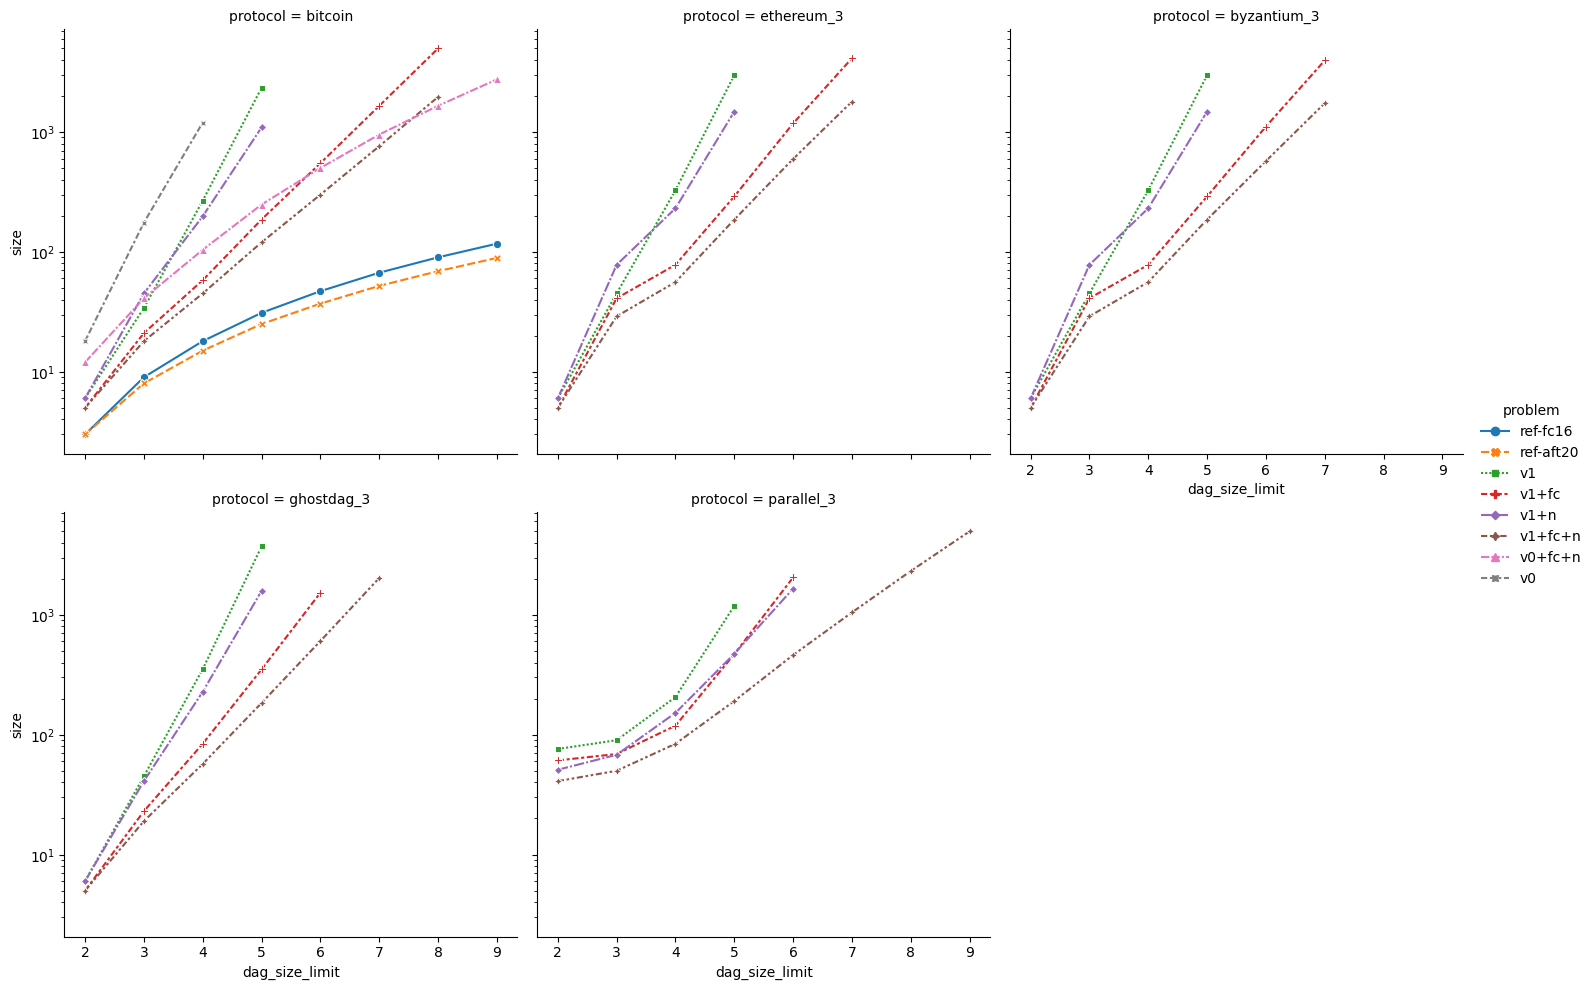

In [2]:
import seaborn

seaborn.relplot(
    data=size_log.query("dag_size_limit < 10"),
    kind="line",
    x="dag_size_limit",
    y="size",
    hue="problem",
    style="problem",
    markers=True,
    col="protocol",
    col_wrap=3,
).set(yscale="log")

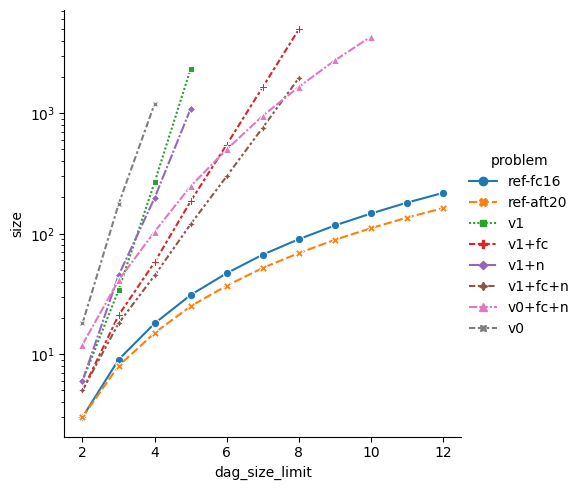

In [3]:
seaborn.relplot(
    data=size_log.query("protocol == 'bitcoin' and dag_size_limit < 13"),
    kind="line",
    x="dag_size_limit",
    y="size",
    hue="problem",
    style="problem",
    markers=True,
).set(yscale="log")

In [4]:
cutoff = (
    max(
        size_log.query(
            "problem.str.startswith('v1') and protocol == 'bitcoin'"
        ).dag_size_limit
    )
    + 1
)

btc_size = (
    size_log.query("protocol == 'bitcoin'")
    .query(f"dag_size_limit <= {cutoff}")
    .loc[:, ["dag_size_limit", "problem", "size"]]
    .drop_duplicates()
    .pivot(index="dag_size_limit", columns="problem", values="size")
)

btc_size.to_csv("5-state-space-exploration-viz-for-paper-btc-size.csv")
btc_size

problem,ref-aft20,ref-fc16,v0,v0+fc+n,v1,v1+fc,v1+fc+n,v1+n
dag_size_limit,,,,,,,,
2,3.0,3.0,18.0,12.0,6.0,5.0,5.0,6.0
3,8.0,9.0,175.0,41.0,34.0,21.0,18.0,45.0
4,15.0,18.0,1198.0,104.0,267.0,58.0,45.0,198.0
5,25.0,31.0,NaN,248.0,2332.0,186.0,120.0,1090.0
6,37.0,47.0,NaN,501.0,NaN,549.0,300.0,NaN
7,52.0,67.0,NaN,951.0,NaN,1650.0,760.0,NaN
8,69.0,90.0,NaN,1652.0,NaN,4968.0,1959.0,NaN
9,89.0,117.0,NaN,2744.0,NaN,NaN,NaN,NaN


In [5]:
# how should we report on the other protocols?
# column a: show max depth explored in table for fully optimized exploration only; calculate blow up factor and add as columns


def tabulate_deepest(d):
    return d.iloc[d.groupby(["problem", "protocol"]).dag_size_limit.idxmax()]


biggest = (
    tabulate_deepest(size_log)
    .reset_index(drop=True)
    .query("not problem.str.startswith('v1-')")
)

biggest.to_pickle("5-generated-mdps/biggest.pkl.gz")

biggest

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,63,4868,0.124481,0.182194,551bc141
1,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,54,4943,0.174280,0.183495,2b485cf2
2,v0,generic-v0,False,False,True,True,True,bitcoin,4,1198,0.477908,0.231331,7b7881ed
3,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,10,4315,4.012433,0.228352,325855f5
4,v1,generic-v1,False,False,True,True,True,bitcoin,5,2332,1.226828,0.238590,14cf38cc
5,v1,generic-v1,False,False,True,True,True,byzantium_3,5,2981,1.740034,0.240528,63874b80
6,v1,generic-v1,False,False,True,True,True,ethereum_3,5,2981,1.637336,0.240154,380852f6
7,v1,generic-v1,False,False,True,True,True,ghostdag_3,5,3712,2.441943,0.238232,7dbc6d66
8,v1,generic-v1,False,False,True,True,True,parallel_3,5,1189,0.507463,0.238831,1626966c
9,v1+fc,generic-v1,True,False,True,True,True,bitcoin,8,4968,3.315834,0.221619,95d0304d


In [6]:
# how should we report on the other protocols?
# column b: fix depth in table

fixed_cutoff = min(biggest.dag_size_limit)
fixed = (
    size_log.query("not problem.str.startswith('v1-')")
    .query(f"dag_size_limit == {fixed_cutoff}")
    .reset_index(drop=True)
)
fixed.to_pickle("5-generated-mdps/fixed.pkl.gz")
fixed

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,4,18,0.001028,0.173290,2469d26c
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,4,15,0.000389,0.182377,23549bf0
2,v1,generic-v1,False,False,True,True,True,bitcoin,4,267,0.081922,0.182194,10bf8d39
3,v1,generic-v1,False,False,True,True,True,ethereum_3,4,327,0.121194,0.203922,2f121a4b
4,v1,generic-v1,False,False,True,True,True,byzantium_3,4,327,0.129278,0.209507,3d4eddd8
5,v1,generic-v1,False,False,True,True,True,ghostdag_3,4,352,0.156716,0.210522,10147b0d
6,v1,generic-v1,False,False,True,True,True,parallel_3,4,206,0.070239,0.221989,51f91e0c
7,v1+fc,generic-v1,True,False,True,True,True,bitcoin,4,58,0.020006,0.210754,7f71e743
8,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,4,78,0.033353,0.214771,33e2ffb6
9,v1+fc,generic-v1,True,False,True,True,True,byzantium_3,4,78,0.036254,0.214039,62aaf326


In [7]:
combined = pandas.DataFrame(
    dict(
        max_dag_size_limit=biggest.set_index(["problem", "protocol"]).dag_size_limit,
        size_at_fixed_dag_size=fixed.set_index(["problem", "protocol"])["size"],
    )
).reset_index()
combined

,problem,protocol,max_dag_size_limit,size_at_fixed_dag_size
0,ref-aft20,bitcoin,63,15
1,ref-fc16,bitcoin,54,18
2,v0,bitcoin,4,1198
3,v0+fc+n,bitcoin,10,104
4,v1,bitcoin,5,267
5,v1,byzantium_3,5,327
6,v1,ethereum_3,5,327
7,v1,ghostdag_3,5,352
8,v1,parallel_3,5,206
9,v1+fc,bitcoin,8,58


In [8]:
fixed_cutoff

4

In [9]:
combined.query('problem.str.startswith("v1")').set_index(
    ["problem", "protocol"]
).unstack(level=0).stack(level=0, future_stack=True).unstack(level=1)

problem                     v1                                     v1+fc  \
            max_dag_size_limit size_at_fixed_dag_size max_dag_size_limit   
protocol                                                                   
bitcoin                      5                    267                  8   
byzantium_3                  5                    327                  7   
ethereum_3                   5                    327                  7   
ghostdag_3                   5                    352                  6   
parallel_3                   5                    206                  6   

problem                                       v1+fc+n                         \
            size_at_fixed_dag_size max_dag_size_limit size_at_fixed_dag_size   
protocol                                                                       
bitcoin                         58                  8                     45   
byzantium_3                     78                  7                     56   
ethereum_3                      78                  7                     56   
ghostdag_3                      84                  7                     57   
parallel_3                     119                  9                     84   

problem                   v1+n                         
            max_dag_size_limit size_at_fixed_dag_size  
protocol                                               
bitcoin                      5                    198  
byzantium_3                  5                    231  
ethereum_3                   5                    231  
ghostdag_3                   5                    228  
parallel_3                   6                    152